In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import xarray as xr
import pandas as pd
from acIndUtils import acIndUtils, acIndSSTGraphicUtils

**Data retrieval from ERDDAP**
TODO

**Setting some run parameters**

In [2]:
"""
Loading the perimeter of the area of interest
"""
areaPerimeter = pd.read_csv("areas/areaAdriatic.csv")

In [3]:
"""
Defining names and coordinates of the temporary netcdf and csv files used in this elaboration
"""
rawDataFileSpec = acIndUtils.acNcFileSpec(ncFileName="CMEMS_SST.nc", varName="thetao", xVarName="lon", yVarName="lat", tVarName="time" )
rawDataFileSpec.printSpec()
ncClippedDataFileSpec = acIndUtils.acCloneFileSpec(rawDataFileSpec, ncFileName="clippedData.nc")
annualMapsNcFileSpec = acIndUtils.acCloneFileSpec(ncClippedDataFileSpec, ncFileName="clippedAnnualMean.nc", tVarName="year")
winterMapsNcFileSpec = acIndUtils.acCloneFileSpec(annualMapsNcFileSpec, ncFileName="clippedWinterMean.nc")
summerMapsNcFileSpec = acIndUtils.acCloneFileSpec(annualMapsNcFileSpec, ncFileName="clippedSummerMean.nc")
trendMapNcSpec = acIndUtils.acCloneFileSpec(annualMapsNcFileSpec, ncFileName="trendMap.nc")
meanTimeSeriesCsv = "meanTimeSeries.csv"

  ncFileName: CMEMS_SST.nc
  varName: thetao
  xVarName: lon
  yVarName: lat
  zVarName: 
  tVarName: time


**Generating the pre-aggregates**

In [13]:
"""
clipping the input data over the area of interest (may require some time)
"""
clippedData = acIndUtils.acClipDataOnRegion(rawDataFileSpec, areaPerimeter, ncClippedDataFileSpec.ncFileName)

CMEMS SST Dimension: <acIndUtils.acIndUtils.acNcFileSpec object at 0x7fc70890f520>
Clipped Area Dimensions:            LON        LAT
0    19.641391  39.744436
1    18.375273  39.798191
2    18.391109  39.816245
3    18.399336  39.899609
4    18.399436  39.936100
..         ...        ...
413  19.694582  39.794718
414  19.673055  39.793055
415  19.650836  39.772500
416  19.640000  39.756664
417  19.641391  39.744436

[418 rows x 2 columns]
preselecting the mininumn containing rectangle, saving to  clippedData.nc
clipping over the polygon and storing frame by frame (may take a while ...)
  done 100 %


In [26]:
"""
Generating the temporary nc file with the annual means
"""
acIndUtils.acGenerate2DAnnualMeanMaps(ncClippedDataFileSpec, annualMapsNcFileSpec.ncFileName)
print("done")

done


In [27]:
"""
Generating the temporary nc file with the winter means
"""
acIndUtils.acGenerate2DSeasonalWinter(ncClippedDataFileSpec, winterMapsNcFileSpec.ncFileName)
print("done")

done


In [28]:
"""
Generating the temporary nc file with the summer means
"""
acIndUtils.acGenerate2DSeasonalSummer(ncClippedDataFileSpec, summerMapsNcFileSpec.ncFileName)
print("done")

done


In [29]:
"""
Generating the temporary csv file with the daily time series
"""
clippedData1Dcsv = acIndUtils.acGenerateMeanTimeSeries(ncClippedDataFileSpec, meanTimeSeriesCsv)
print("done")

done


In [25]:
"""
Generating the temporary nc file with the map of trend.
"""
acIndUtils.acComputeSenSlope2DMap(annualMapsNcFileSpec, trendMapNcSpec.ncFileName, smoothingKernelSide=4)
print("done")

done


**Generating the plots**

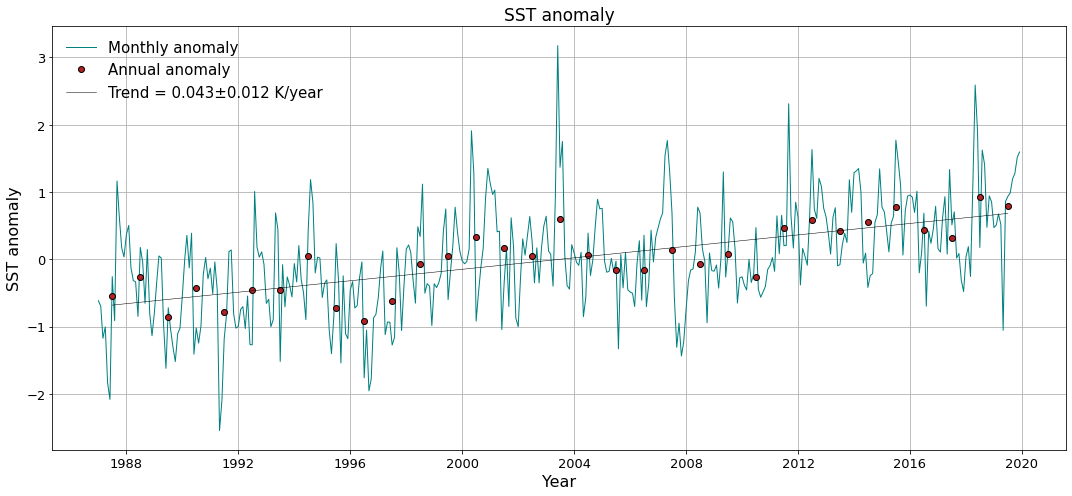

In [35]:
"""
Time series of SST anomaly.
"""
figSSTTimeSeries = acIndSSTGraphicUtils.acPlotSSTTimeSeries(meanTimeSeriesCsv)

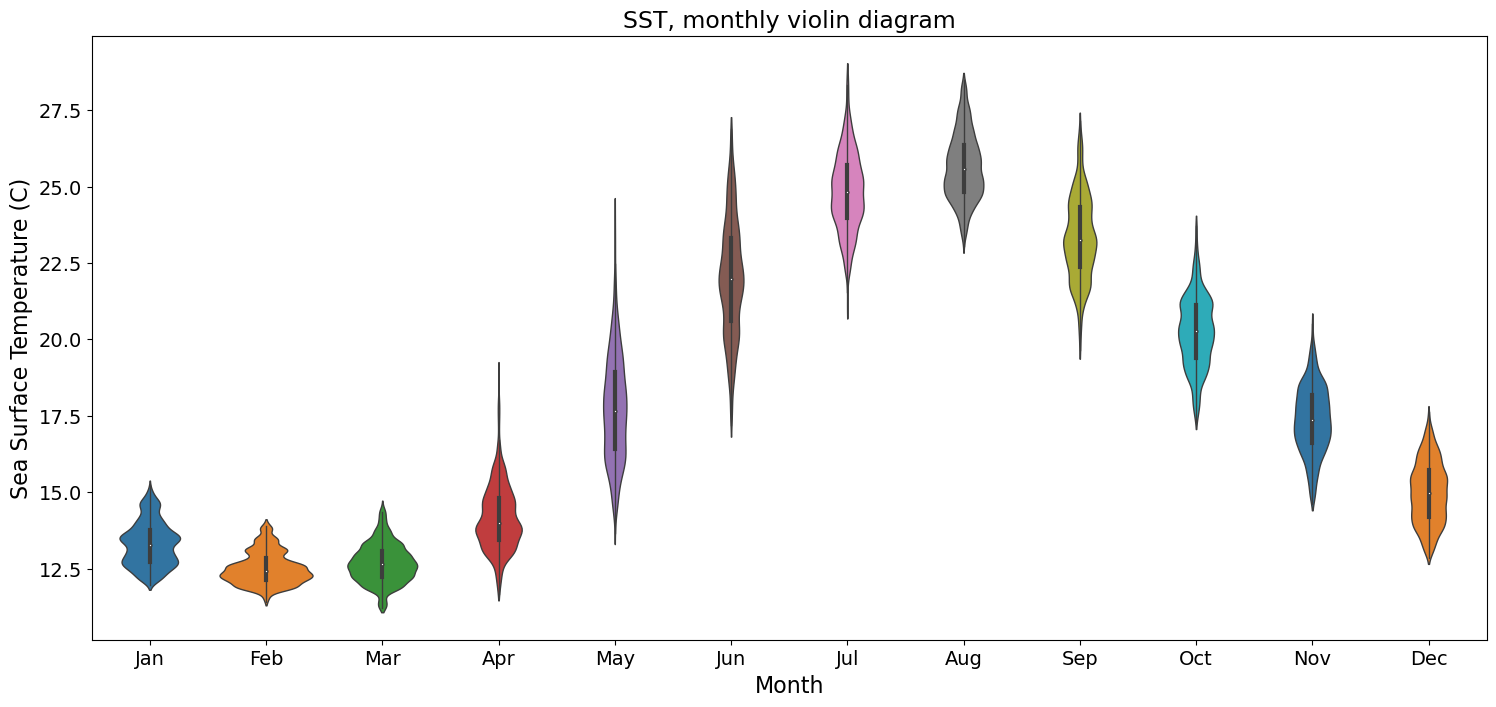

In [59]:
"""
Violin diagram: for each month shows the empirical distribution of mean SST across the whole time extent of the dataset
"""
figSSTViolinPlot = acIndSSTGraphicUtils.acSSTViolinPlot(meanTimeSeriesCsv)

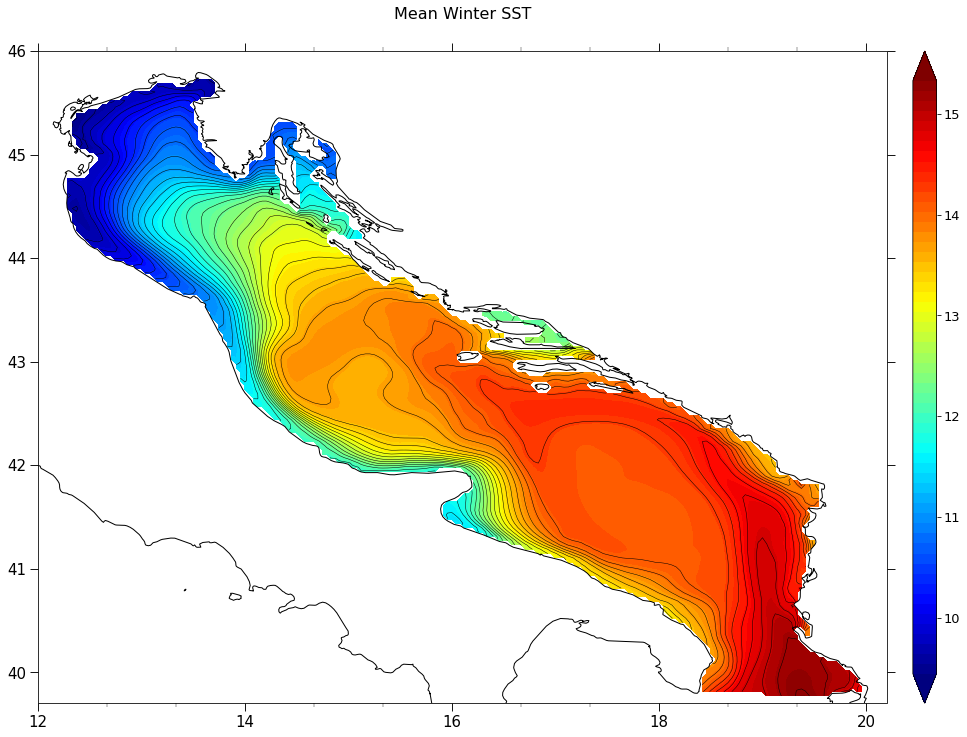

In [52]:
"""
Map of Winter mean SST. Season defined as in Artegiani et al. 1997 (JFMA).
"""
winterPlot = acIndSSTGraphicUtils.plotMeanMap(winterMapsNcFileSpec, "Mean Winter SST")

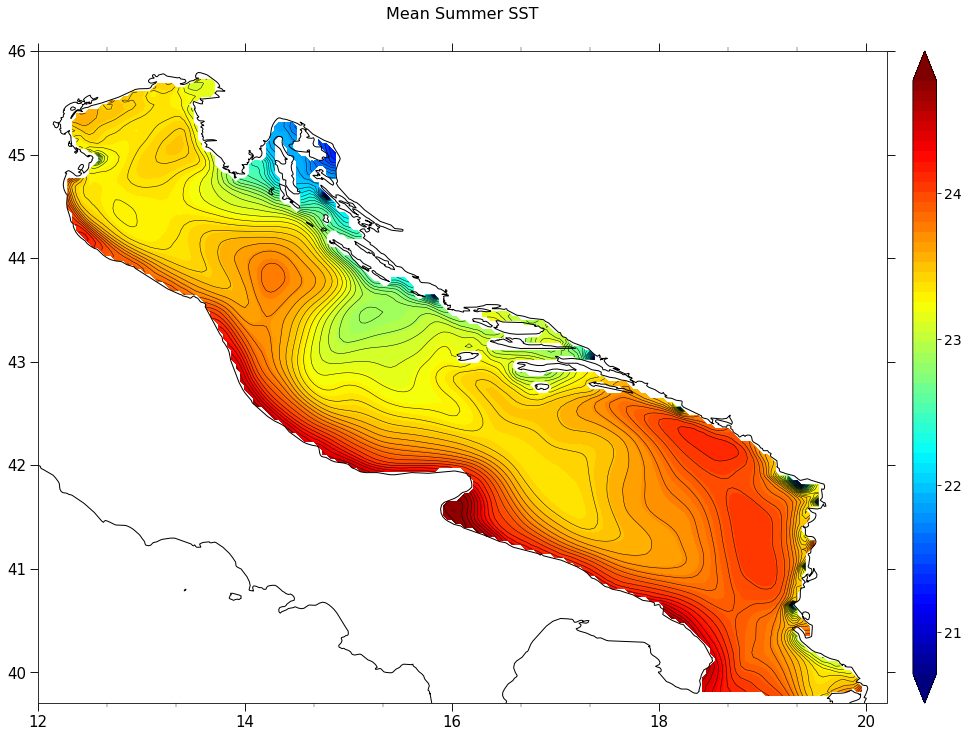

In [58]:
"""
Map of Summer mean SST. Season defined as in Artegiani et al. 1997 (JASO).
"""
winterPlot = acIndSSTGraphicUtils.plotMeanMap(summerMapsNcFileSpec, "Mean Summer SST")

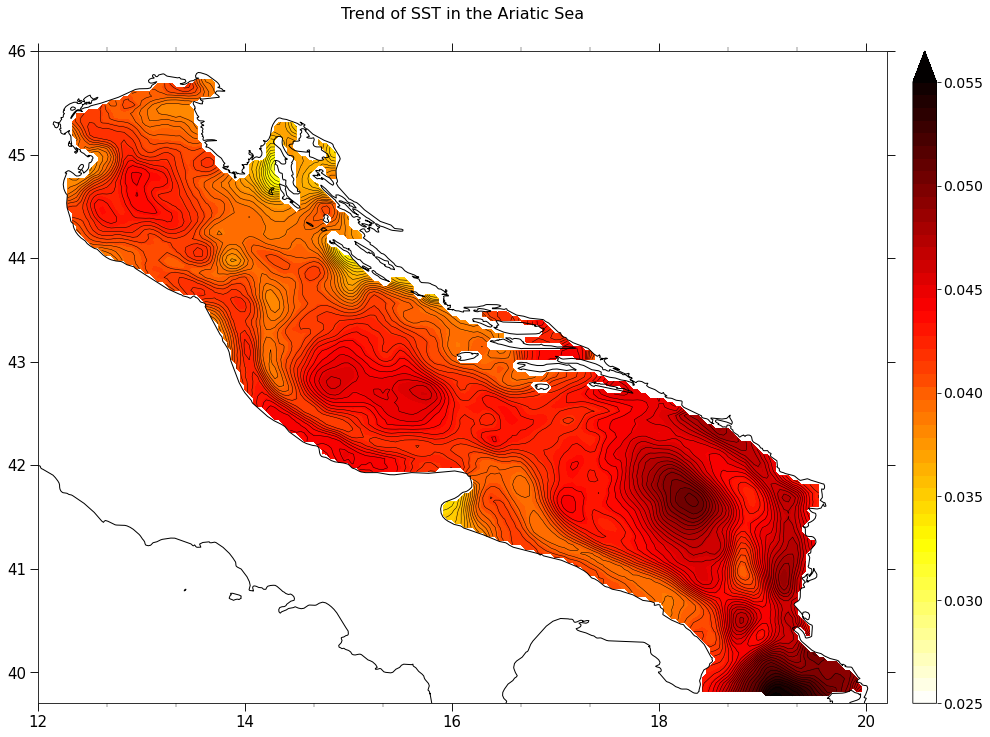

In [57]:
# effettuare smoothing spaziale
trendMapPlot = acIndSSTGraphicUtils.plotTrendMap(trendMapNcSpec)